# Convolution of Rectangles

Examining the effects of geometric operations on Rectangles
by convolution and how this can be expressed programatically in Python.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sympy as sym
import scipy as sp
from scipy import signal

import matplotlib.pyplot as plt

# Numerical Convoltion with SciPy

Information on the included convolution function with `scipy` can be
found in the 
[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

## 1D Convolution of 2 Rectangles

In the following, $2$ rectangles, $R_{1}$ and $R_{2}$, are represented by 
_rectangular pulse_ signals describing the rectangle that is being moved,
and the constraint the other rectangle imposes.
In terms of signal processing, $R_{1}$ is the _signal_ and $R_{2}$ is the 
_filter_.

### Overlap

$R_{1}$ (`R1`) in this example is the rectangle that
gets _moved_ from left to right. With $R_{1,l} = 100$ and $R_{1,r} = 200$.
$R_{2}$ (`R2`) is any rectangle, imposing an overlap constraint on $R_{1}$. 
In this case, $R_{2}$ is defined by $R_{2,l} = 120$ and $R_{2,r} = 180$.
Where the result of the convolution (`res`) of these signals is $0$ whenever
this constaint is not violated.

In [3]:
R1 = lambda x: 0. if x <= 100 or x >= 200 else 1.
R2 = lambda x: 0. if x <= 120 or x >= 180 else 1.

x = np.arange(301)                          # vector from 0 to 300 (discrete)
R1_eval = [R1(x_) for x_ in x]              # Evaluates R1 for each value in t
R2_eval = [R2(x_) for x_ in x]              # Evaluates R2 for each value in t
#R2_eval = signal.unit_impulse(300, 150)    # For a rectangle with minimal length (dirac)

# Divide by sum over filter, to scale back y-values of convolution back to [0 ... 1]
res = signal.convolve(R1_eval, R2_eval, mode='same') / sum(R2_eval)

#### Plot the Result

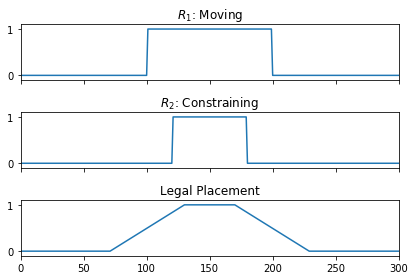

In [5]:
fig, (ax_R1, ax_R2, ax_res) = plt.subplots(3, 1, sharex=True)

ax_R1.plot(R1_eval)
ax_R1.set_title('$R_{1}$: Moving')
ax_R1.margins(0, 0.1)
ax_R2.plot(R2_eval)
ax_R2.set_title('$R_{2}$: Constraining')
ax_R2.margins(0, 0.1)
ax_res.plot(res)
ax_res.set_title('Legal Placement')
ax_res.margins(0, 0.1)
fig.tight_layout()
#fig.show()

### Minimal Edge Distance
$R_{1}$ is again the rectangle, which is moved along the $x$-axis, 
with $R_{1,l} = 140$ and $R_{1,r} = 160$.
$R_{2}$ keeps the same dimensions as above, however this time
it is described by the minium legal edge dsitance to any other shape.
In this example it is sepcified as $2$ arbitrary units in either direction 
of its edge.

**Note**: The functions from above can also be defined by multiplying 
the _boolean_ return value of `(x < y)` by a floating point number, denoted by 
the `.` after the numeral.
A boolean expression returns `True` or `False` which may be interpreted as
`1` and `0` respectively.
If multiplied by `1.`, the datatype is converted to `float`
and the value may be used further in calculations.

$$ 
R_{1}(x) = 1 \cdot 
\begin{cases}
    1, & \text{if } x \lt 160 \\
    0, & \text{otherwise}
\end{cases} - 1 \cdot
\begin{cases}
    1, & \text{if } x \lt 140 \\
    0, & \text{otherwise}
\end{cases}
$$

In [6]:
R1 = lambda x: (1. * (x < 160)) - (1. * (x < 140))
R2 = lambda x: ((1. * (x < 122)) - (1. * (x < 118)))\
             + ((1. * (x < 182)) - (1. * (x < 178)))   # '\' denotes a new line

x = np.linspace(0,300,num=3000)     # vector from 0 to 300 (pseudo continuous)
R1_eval = [R1(x_) for x_ in x]      # Evaluates R1 for 3000 steps between 0 and 300
R2_eval = [R2(x_) for x_ in x]      # Evaluates R2 for 3000 steps between 0 and 300

# 1/2 * Σ(R2_eval) because the filter now has 2 pulses
res = signal.convolve(R1_eval, R2_eval, mode='same') / (.5 * sum(R2_eval))

#### Plot the Results

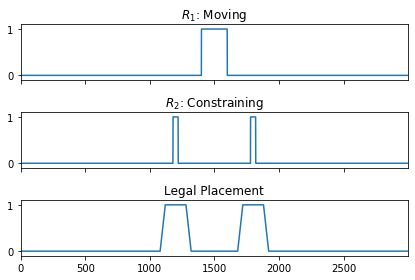

In [7]:
fig, (ax_R1, ax_R2, ax_res) = plt.subplots(3, 1, sharex=True)

ax_R1.plot(R1_eval)
ax_R1.set_title('$R_{1}$: Moving')
ax_R1.margins(0, 0.1)
ax_R2.plot(R2_eval)
ax_R2.set_title('$R_{2}$: Constraining')
ax_R2.margins(0, 0.1)
ax_res.plot(res)
ax_res.set_title('Legal Placement')
ax_res.margins(0, 0.1)
fig.tight_layout()
#fig.show()

As seen above, this smaller $R_{1}$ fits _inside_ $R_{2}$.
Restoring $R_{2}$'s orignial size from the first scenario, 
with $R_{1,l} = 100$ and $R_{1,r} = 200$, 
making it larger than the legal _gap_ inside $R_{2}$, shows that it can
now only be placed outside of $R_{2}$

In [8]:
R1 = lambda x: (1. * (x < 200)) - (1. * (x < 100))
R2 = lambda x: ((1. * (x < 122)) - (1. * (x < 118)))\
             + ((1. * (x < 182)) - (1. * (x < 178)))

t = np.arange(301)
R1_eval = [R1(x_) for x_ in x]
R2_eval = [R2(x_) for x_ in x]

res = signal.convolve(R1_eval, R2_eval, mode='same') / (.5 * sum(R2_eval))

#### Plot the Result

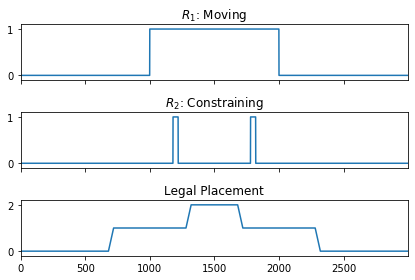

In [9]:
fig, (ax_R1, ax_R2, ax_res) = plt.subplots(3, 1, sharex=True)

ax_R1.plot(R1_eval)
ax_R1.set_title('$R_{1}$: Moving')
ax_R1.margins(0, 0.1)
ax_R2.plot(R2_eval)
ax_R2.set_title('$R_{2}$: Constraining')
ax_R2.margins(0, 0.1)
ax_res.plot(res)
ax_res.set_title('Legal Placement')
ax_res.margins(0, 0.1)
fig.tight_layout()
#fig.show()

### Interpreting the Results

This plot also shows, what happens if an operation violates 
more than one constraint.
The value of `res` denotes the amount
of constraints that are being violated at a given $x$. 

## 2D Convolution of 2 Rectangles

`scipy` comes with the appropriate function to do 2D convolution much the same way.



### Overlap

Here $R_{1}$ is the rectangle that is moved across $2$D space, called the
_filter_ or _kernel_. $R_{2}$ is constraining this operation, by only allowing
$R_{1}$ to be placed where it doesn't overap.
This particular $2$D space is defined as a $15 \times 15$ grid.
For simplification, $0$s denote empty / _legal_ grid space,
and $1$ denotes the presence of a shape which may not be overlapped.

In [10]:
w,h = 15,15                             # Grid dimensions

# The filter has to be centered within the grid.
R1 = np.pad( np.ones([3, 3])            # 3x3 square matrix with 1 at each index describing the kernel
           , (6, 6)                     # padding for 6 indices in each derection, for both axis
           , 'constant'                 # padding with constant values
           , constant_values=(0, 0) )   # these constant values are 0 for both axis

R2 = np.zeros([w, h])                   # Empty base grid (0s)
R2[6:9, 3:7] = 1                        # Place random rectangle

res = signal.convolve2d(R1, R2, boundary='symm', mode='same')

#### Plot the Results

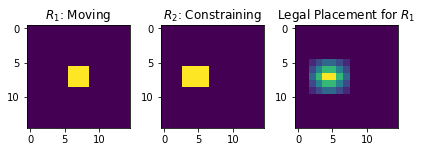

In [11]:
fig, (ax_R1, ax_R2, ax_res) = plt.subplots(1, 3)

ax_R1.set_aspect('equal')
ax_R1.imshow(R1, interpolation='nearest')
ax_R1.set_title('$R_{1}$: Moving')

ax_R2.set_aspect('equal')
ax_R2.imshow(R2, interpolation='nearest')
ax_R2.set_title('$R_{2}$: Constraining')
ax_res.set_aspect('equal')
ax_res.imshow(res, interpolation='nearest')
ax_res.set_title('Legal Placement for $R_{1}$')
fig.tight_layout()
#fig.show()

# Symbolic Convolution with Sympy

General information on symbolic integration with `sympy` can be found in the 
[documentation](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=integrate#sympy.integrals.integrals.integrate).

## 1D Continuos Convolution

$1$ Dimensional time continuous convolution is defined as

$$ f(t) * g(t) = \int^{\infty}_{\infty} f(\tau) \cdot g(t - \tau) d\tau $$

Which can be expressed in Programatically as follows:

In [12]:
def convolve_1D(f, g, t, lower=-sym.oo, upper=sym.oo):
    tau = sym.symbols('tau')
    convolution = sym.integrate( f.subs(t, tau) * g.subs(t, t - tau)
                               , (tau, lower, upper))
    return convolution

Or shorter, however this implies that symbols `t` and `tau` are defined 
outside the function.
Additionaly, this may cause problems when evaluating, 
because no integral limits are specified.

In [13]:
tau = sym.symbols('tau')
t = sym.symbols('t')
conv_1D = lambda f,g,t: sym.integrate(f.subs(t, tau) * g.subs(t, (t - tau)), tau)

Additionally, if $\mathcal{F}$ denotes the _Fourier Transform Operator_,
the convolution theorem states that:
$$ f * g = \mathcal{F}^{-1} \{ \mathcal{F}\{f\} \cdot \mathcal{F}\{g\}\}$$
Which can be expressed Programatically as follows:

In [14]:
def convolve_1D_ft (f, g, t): 
    tau = sym.symbols('tau')
    F = sym.fourier_transform(f, t, tau)
    G = sym.fourier_transform(g, t, tau)
    FG = sym.simplify(F * G)
    return sym.inverse_fourier_transform(FG, tau, t)

### Overlap

When pretending that a Rectangle moving in space is a
signal moving in time, the same scenario as in the previous section, 
can no be described symbolicaly with `sympy`.

Unfortunately because of 
[a bug](https://github.com/sympy/sympy/issues/18636) 
sympy is currently unable to resolve the `Heaviside` name to 
the corresponding `numpy` function. 
So substitution has to be done manually instead of _lambdifying_.

In [17]:
t = sym.symbols('t')

R1 = sym.Heaviside(200. - t) - sym.Heaviside(100. - t)
R2 = sym.Heaviside(150. - t) - sym.Heaviside(140. - t)

res = convolve_1D(R1, R2, t, lower=0., upper=300.)
res = sym.simplify(res)

# This doesn't work because of issue #18636
# see github: https://github.com/sympy/sympy/issues/18636
# This bug may be fixed in future versions of sympy
#R1_lamb = sym.lambdify(t, R1, modules=['numpy'])
#R2_lamb = sym.lambdify(t, R2, modules=['numpy'])

# So it has to be done this way ¯\_(ツ)_/¯ 
t_vals = np.linspace(0,300, num=300)
R1_eval = [R1.subs(t,t_) for t_ in t_vals]
R2_eval = [R2.subs(t,t_) for t_ in t_vals]

# +150 is necessary because the base signal R1 wasn't 0 centered and
# convolve_1D has no "mode='same'" option (yet).

res_eval = [res.subs(t,t_+150) for t_ in t_vals]

-(t - 350.0)⋅θ(350.0 - t)⋅θ(450.0 - t) + (t - 340.0)⋅θ(340.0 - t)⋅θ(440.0 - t)
 + (t - 250.0)⋅θ(250.0 - t)⋅θ(450.0 - t) - (t - 240.0)⋅θ(240.0 - t)⋅θ(440.0 - 
t) + ((t - 350.0)⋅θ(350.0 - t) + 200.0)⋅θ(150.0 - t) - ((t - 340.0)⋅θ(340.0 - 
t) + 200.0)⋅θ(140.0 - t) - ((t - 250.0)⋅θ(250.0 - t) + 100.0)⋅θ(150.0 - t) + (
(t - 240.0)⋅θ(240.0 - t) + 100.0)⋅θ(140.0 - t)


#### Plot the Results

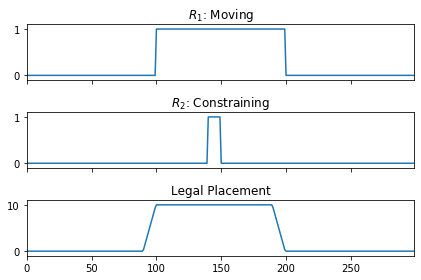

In [18]:
fig, (ax_R1, ax_R2, ax_res) = plt.subplots(3, 1, sharex=True)

ax_R1.plot(R1_eval)
ax_R1.set_title('$R_{1}$: Moving')
ax_R1.margins(0, 0.1)
ax_R2.plot(R2_eval)
ax_R2.set_title('$R_{2}$: Constraining')
ax_R2.margins(0, 0.1)
ax_res.plot(res_eval)
ax_res.set_title('Legal Placement')
ax_res.margins(0, 0.1)
fig.tight_layout()
#fig.show()

#### Examin the Result

The result does not have to be evaluated, it can
be examined symbolicaly as well.

In [19]:
sym.pretty_print(res)

-(t - 350.0)⋅θ(350.0 - t)⋅θ(450.0 - t) + (t - 340.0)⋅θ(340.0 - t)⋅θ(440.0 - t)
 + (t - 250.0)⋅θ(250.0 - t)⋅θ(450.0 - t) - (t - 240.0)⋅θ(240.0 - t)⋅θ(440.0 - 
t) + ((t - 350.0)⋅θ(350.0 - t) + 200.0)⋅θ(150.0 - t) - ((t - 340.0)⋅θ(340.0 - 
t) + 200.0)⋅θ(140.0 - t) - ((t - 250.0)⋅θ(250.0 - t) + 100.0)⋅θ(150.0 - t) + (
(t - 240.0)⋅θ(240.0 - t) + 100.0)⋅θ(140.0 - t)


### Symbolic Fourier Transform

Using scipy's `FFT` is much faster for defined intervalls. A symbolic Fourier Transform
is onl

# Feature Checklist

- [X] 1D Numeric Overlap
- [X] 1D Numeric Edge Distance
- [ ] 1D Numeric Stretch Operation
- [X] 2D Numeric Overlap
- [ ] 2D Numeric Edge Distance
- [ ] 2D Numeric Stretch Operation
- [X] 1D Symbolic with integration
- [X] 1D Symbolic with fourier transform
- [ ] Fix recursion error when calling $\mathcal{F}^{-1}$
- [X] 1D Symbolic Overlap
- [ ] 1D Symbolic Edge Distance
- [ ] 1D Symbolic Stretch Operation
- [X] Mention `sympy` `lambdify` bug for `Heaviside`
- [ ] Implement 'same' option for `conv_1D` function
- [X] Mention boolean value multiplication behaviour when evaluating `sympy` functions
- [ ] 2D Symbolic with integration
- [ ] 2D Symbolic with fourier transform
- [ ] 2D Symbolic Overlap
- [ ] 2D Symbolic Edge Distance
- [ ] 2D Symbolic Stretch Operation